In [164]:
#import relevant modules first
import numpy as np
import matplotlib.pyplot as plt
import csv

In [165]:
import warnings
# To ignore all warnings
warnings.filterwarnings("ignore")

In [166]:
# Constants
G = 6.672e-11  # Gravitational constant in m^3/(kg*s)
D = 100e3 #Compensation Depth
T = 31e3  #thikness at the compensation depth
R = 6371e3    #Radius of the Earth (MSL)
rho_0 = 2670  # Constant density of the Earth's core in kg/m^3
rho_M = 3270  # Constant density of the Earth's mantle in kg/m^3

In [167]:
#Density of the contrast in the steps  of 1km
H_range = np.arange(0, 10001, 1000)

# Initialize arrays
rho_1_p = np.zeros_like(H_range, dtype=float)
delta_rho_p = np.zeros_like(H_range, dtype=float)
delta_g_iso_p = np.zeros_like(H_range, dtype=float)

rho_s = np.zeros_like(H_range, dtype=float)
delta_rho_s = np.zeros_like(H_range, dtype=float)
delta_g_iso_s = np.zeros_like(H_range, dtype=float)

t_p = np.zeros_like(H_range, dtype=float)
t_s = np.zeros_like(H_range, dtype=float)
ah_delta_g_iso_p = np.zeros_like(H_range, dtype=float)
ah_delta_g_iso_s = np.zeros_like(H_range, dtype=float)

In [168]:
# Model 1
print("*Pratt-Hayford-Model*")
for i, H in enumerate(H_range):
    rho_1_p[i] = (D * rho_0) / (H + D)
    delta_rho_p[i] = rho_0 - rho_1_p[i]
    delta_g_iso_p[i] = G*D*delta_rho_p[i]
    
    rho_s[i] = rho_0 * ((2*R**3 - (R - D)**3 - (R+H)**3)/(R**3 - (R - D)**3))
    delta_rho_s[i] = rho_s[i] - rho_0
    delta_g_iso_s[i] = G*D*delta_rho_s[i]
    
print(rho_1_p)
print(delta_rho_p)
print(delta_g_iso_p)

print(rho_s)
print(delta_rho_s)
print(delta_g_iso_s)

*Pratt-Hayford-Model*
[2670.         2643.56435644 2617.64705882 2592.23300971 2567.30769231
 2542.85714286 2518.86792453 2495.3271028  2472.22222222 2449.5412844
 2427.27272727]
[  0.          26.43564356  52.35294118  77.76699029 102.69230769
 127.14285714 151.13207547 174.6728972  197.77777778 220.4587156
 242.72727273]
[0.         0.00017638 0.0003493  0.00051886 0.00068516 0.0008483
 0.00100835 0.00116542 0.00131957 0.0014709  0.00161948]
[2670.         2642.872236   2615.73595599 2588.59115862 2561.43784257
 2534.2760065  2507.10564906 2479.92676893 2452.73936476 2425.54343523
 2398.33897898]
[   0.          -27.127764    -54.26404401  -81.40884138 -108.56215743
 -135.7239935  -162.89435094 -190.07323107 -217.26063524 -244.45656477
 -271.66102102]
[ 0.         -0.000181   -0.00036205 -0.00054316 -0.00072433 -0.00090555
 -0.00108683 -0.00126817 -0.00144956 -0.00163101 -0.00181252]


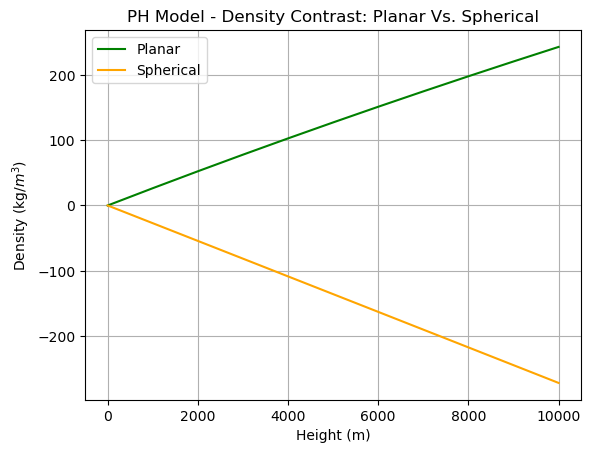

In [170]:
plt.title('PH Model - Density Contrast: Planar Vs. Spherical')
plt.plot(H_range,delta_rho_p, color='green', label='Planar')
plt.plot(H_range,delta_rho_s, color='orange', label='Spherical')
plt.xlabel('Height (m)')
plt.ylabel('Density (kg/$m^3$)')
plt.legend()
plt.grid()
plt.show()

In [171]:
import csv
# Write results to a CSV file
with open('Density_contrast.csv', 'w', newline='') as csvfile:
    fieldnames = ['H', 'delta_rho_p', 'delta_rho_s']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for i, H in enumerate(H_range):
        writer.writerow({'H': H, 'delta_rho_p': delta_rho_p[i], 'delta_rho_s': delta_rho_s[i]})

print("Results written to Density_contrast.csv")

Results written to Density_contrast.csv


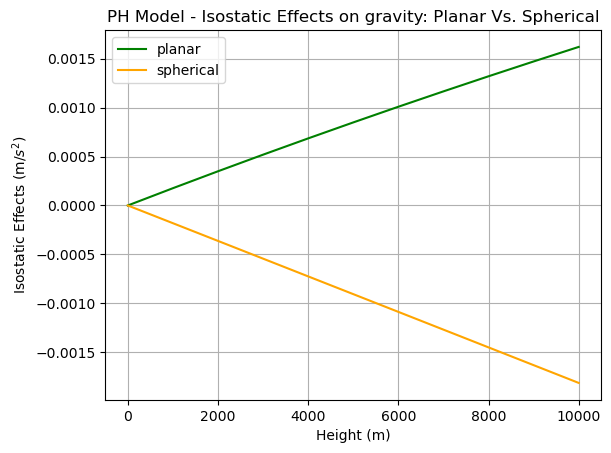

In [173]:
plt.title('PH Model - Isostatic Effects on gravity: Planar Vs. Spherical')
plt.plot(H_range,delta_g_iso_p, color='green', label='planar')
plt.plot(H_range,delta_g_iso_s, color='orange', label='spherical')
plt.xlabel('Height (m)')
plt.ylabel('Isostatic Effects (m/$s^2$)')
plt.legend()
plt.grid()
plt.show()

In [174]:

# Write results to a CSV file
with open('ph_isostatic_effects.csv', 'w', newline='') as csvfile:
    fieldnames = ['H', 'delta_g_iso_p', 'delta_g_iso_s']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for i, H in enumerate(H_range):
        writer.writerow({'H': H, 'delta_g_iso_p': delta_g_iso_p[i], 'delta_g_iso_s': delta_g_iso_s[i]})

print("Results written to ph_isostatic_effects.csv',")

Results written to ph_isostatic_effects.csv',


In [175]:
# Model 2
print("*Airy Hiskanen Model*")
for i, H in enumerate(H_range):
    t_p[i] = (rho_0 * H)/ (rho_M - rho_0)
    t_s[i] = R - T - ((R-T)**3 - (rho_0/(rho_M - rho_0))*((R + H)**3 - R**3))**(1/3)

    ah_delta_g_iso_p[i] = G*(rho_M - rho_0)*t_p[i]
    ah_delta_g_iso_s[i] = G*(rho_M - rho_0)*t_s[i]
    
    
print(t_p)
print(t_s)

# Print the arrays
print(ah_delta_g_iso_p)
print(ah_delta_g_iso_s)

*Airy Hiskanen Model*
[    0.  4450.  8900. 13350. 17800. 22250. 26700. 31150. 35600. 40050.
 44500.]
[5.58793545e-09 4.49751883e+03 9.00284714e+03 1.35160140e+04
 1.80370485e+04 2.25659803e+04 2.71028388e+04 3.16476539e+04
 3.62004554e+04 4.07612736e+04 4.53301387e+04]
[0.         0.00017814 0.00035628 0.00053443 0.00071257 0.00089071
 0.00106885 0.001247   0.00142514 0.00160328 0.00178142]
[2.23696232e-16 1.80044674e-04 3.60401977e-04 5.41073071e-04
 7.22059127e-04 9.03361323e-04 1.08498084e-03 1.26691888e-03
 1.44917663e-03 1.63175530e-03 1.81465611e-03]


In [176]:
# Write results to a CSV file
with open('results.csv', 'w', newline='') as csvfile:
    fieldnames = ['H', 'ah_delta_g_iso_p', 'ah_delta_g_iso_s']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for i, H in enumerate(H_range):
        writer.writerow({'H': H, 'ah_delta_g_iso_p': ah_delta_g_iso_p[i], 'ah_delta_g_iso_s': ah_delta_g_iso_s[i]})

print("Results written to results.csv")

Results written to results.csv


In [177]:
# Write results to a CSV file
with open('results_rootdepth.csv', 'w', newline='') as csvfile:
    fieldnames = ['H', 't_p', 't_s']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    
    writer.writeheader()
    for i, H in enumerate(H_range):
        writer.writerow({'H': H, 't_p': t_p[i], 't_s': t_s[i]})

print("Results written to results_rootdepth.csv")

Results written to results_rootdepth.csv
